In [67]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [154]:
class KalmanFilter:
    def __init__(self, sigma_x, sigma_q):
        self.P = np.array([[sigma_x*sigma_x, 0.0], [0.0, 1000000.0]])
        self.Q = np.ones((2,2)) * (sigma_q*sigma_q)
        self.R = np.ones((1,1)) * (sigma_x*sigma_x)
        self.is_init = False
        
    def predict(self, dt):
        A = np.array([[1.0, dt],[0.0, 1.0]])
        self.x = A.dot(self.x)
        A_t = np.transpose(A)
        self.P = A.dot(self.P).dot(A.T) + self.Q
    
    def update(self, measurement):
        H = np.array([[1.0, 0.0]])
        
        PHt = self.P.dot(H.T)
        S = H.dot(PHt) + self.R
        S_i = np.linalg.inv(S)
        
        K = PHt.dot(S_i)
        #print ('K = ', K)
        
        z = np.array([[measurement]])
        
        self.x = self.x + K.dot(z - H.dot(self.x))
        I = np.identity(2)
        self.P = (I - K.dot(H)).dot(self.P)
        
    def process(self, measurement, dt):
        #print ('-'*50)
        #print ('measurement = ', measurement)
        if not self.is_init:
            self.x = np.array([[measurement],[0.0]])
            self.is_init = True
            return
        #print ('x = ')
        #print (self.x)
        self.predict(dt)
        #print ('x_predicted = ')
        #print ( self.x)
        self.update(measurement)
        #print ('x_ouput = ')
        #print (self.x)

    def state(self):
        return self.x

    def covar(self):
        return self.P

Car is moving with constant speed along x-axis. Every second one measurement is taken. Let's see what happends:

In [155]:
sigma = 1.0
sigma_q = 0.3
v = 10.0
dt = 1.0

x_actual = 10.0
v_actual = v

kf = KalmanFilter(sigma, sigma_q)
no_iter = 200

measured = []
actual = []
position = []
vs = []
covars = []
t = range(no_iter)


for i in t:
    x_measured = random.gauss(x_actual, sigma)
    kf.process(x_measured, dt)

    measured.append(x_measured - x_actual)
    actual.append(x_actual)
    position.append(kf.state()[0][0] - x_actual)
    vs.append(kf.state()[1] - v_actual)
    covars.append(kf.covar()[0][0])

    x_actual += v*dt

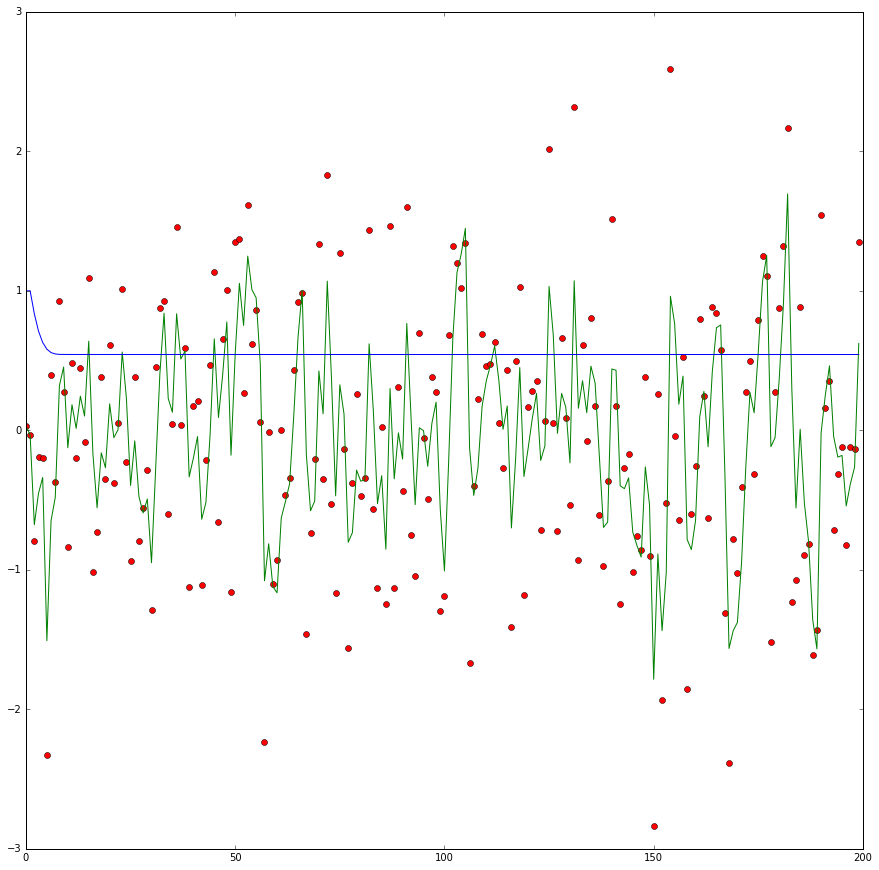

In [156]:
plt.figure(figsize=(15, 15))
plt.plot(t, measured, 'ro', t, position, 'g', t, covars, 'b')
plt.show()

In [157]:
print ('measured std_dev = ' , (np.sqrt(sum([x*x for x in measured])/len(measured))))
print ('output std_dev = ' , (np.sqrt(sum([x*x for x in position])/len(measured))))
print ('filter std_dev = ' , (np.sqrt(covars[-1])))

measured std_dev =  0.946296493956
output std_dev =  0.634085047871
filter std_dev =  0.737153910689


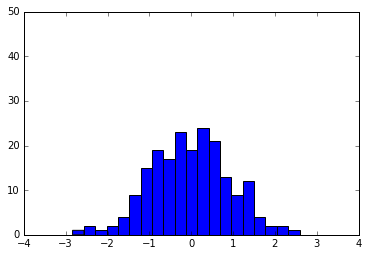

In [158]:
plt.hist(measured, 20)
plt.axis([-4, 4, 0, no_iter/4])
plt.show()

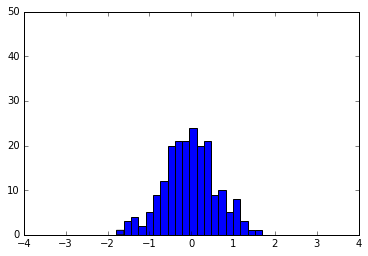

In [159]:
plt.hist(position, 20)
plt.axis([-4, 4, 0, no_iter/4])
plt.show()

Distribution of predictions is much narrower than of measured values which explains a lot Kalmean filter. Extreme values are filtered out and more realistic prediction is given by the filter.